**Introduction**

A bank is trying to conduct a project that will help them predict the tendency of their clients to accept personal loan or not. A set of matrics has been supplied by the bank after conducting an initial trial amongst 5000 customers.

The aim of this project is to use different machine learning models to predict using the supplied metrics, if a potential client is likely to take a personal loan or not. 

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
#We load the data required for our analysis
bankLoan = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', index_col='ID')

In [128]:
#We look at the first 5 lines in the data
bankLoan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [129]:
bankLoan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


**Observations**

Although most columns are identified as being of type int64, they are actually categorical. This will be corrected down the line

In [130]:
bankLoan.shape

(5000, 13)

In [131]:
#We then conduct a statistical summary of the entire dataset
bankLoan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [132]:
bankLoan.groupby('Personal Loan').describe().T

Personal Loan                        0             1
Age                count   4520.000000    480.000000
                   mean      45.367257     45.066667
                   std       11.450427     11.590964
                   min       23.000000     26.000000
                   25%       35.000000     35.000000
                   50%       45.000000     45.000000
                   75%       55.000000     55.000000
                   max       67.000000     65.000000
Experience         count   4520.000000    480.000000
                   mean      20.132301     19.843750
                   std       11.456672     11.582443
                   min       -3.000000      0.000000
                   25%       10.000000      9.000000
                   50%       20.000000     20.000000
                   75%       30.000000     30.000000
                   max       43.000000     41.000000
Income             count   4520.000000    480.000000
                   mean      66.237389    144.745833
                   std       40.578534     31.584429
                   min        8.000000     60.000000
                   25%       35.000000    122.000000
                   50%       59.000000    142.500000
                   75%       84.000000    172.000000
                   max      224.000000    203.000000
ZIP Code           count   4520.000000    480.000000
                   mean   93152.428761  93153.202083
                   std     2156.949654   1759.223753
                   min     9307.000000  90016.000000
                   25%    91911.000000  91908.750000
                   50%    93437.000000  93407.000000
...                                ...           ...
Securities Account std        0.302961      0.331064
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      0.000000
                   max        1.000000      1.000000
CD Account         count   4520.000000    480.000000
                   mean       0.035841      0.291667
                   std        0.185913      0.455004
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        0.000000      1.000000
                   max        1.000000      1.000000
Online             count   4520.000000    480.000000
                   mean       0.595796      0.606250
                   std        0.490792      0.489090
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        1.000000      1.000000
                   75%        1.000000      1.000000
                   max        1.000000      1.000000
CreditCard         count   4520.000000    480.000000
                   mean       0.293584      0.297917
                   std        0.455454      0.457820
                   min        0.000000      0.000000
                   25%        0.000000      0.000000
                   50%        0.000000      0.000000
                   75%        1.000000      1.000000
                   max        1.000000      1.000000

[96 rows x 2 columns]

**Observations**

1. Income is heavily right skewed.

2. Average age of customers is 45 years

3. Mortgage, income and CCAvg are heavily right skewed

4. This implies that there is possibly a good correlation between income level, mortgage and average spend on credit card 

5. Experience and age are normally distributed

6. Amongt the Class 1, the average salary is about 142.5 compared to 59 in the class 0. This shows there is a higher average income/earning power in the cass that collect personal loan compared to the class that do not.


In [133]:
bankLoan_ft1 = bankLoan.drop(['ZIP Code'], axis=1)

In [134]:
#sns.pairplot(bankLoan_ft1, diag_kind='kde', hue='Personal Loan' )

**Observations from pairplot**

1. Only income and creditcard spend shows considerable propensity to help discriminate if a person will take personal loan or not.

2. Based on the features as displayed in the pair plot, there is a strong overlap between personal loan acceptance / rejection and most of the attributes listed. Therefore differentiation based on the attributes may be difficult.

In [135]:
#We conduct a summary of the two categories in the features column
bankLoan.groupby('Personal Loan').count()


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


**Observations**

There are two main classes in the features column (Personal Loan). The Class 0 corresponding to those who didn't collect the personal loan and the class 1 corresponding to the class that collected personal loan. There is a class imbalance and this may affect our predictability of the Class 1.

In [136]:
#We specify the target column and the features column
bankLoan_Target = bankLoan['Personal Loan']
bankLoan_ftr = bankLoan.drop(['Personal Loan', 'ZIP Code'], axis = 1)

In [137]:
#We import the main libraries required for our modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm


In [150]:
#We convert some crtical features class from integers to categories
bankLoan_ftr['Family'] = bankLoan_ftr['Family'].astype('category')
bankLoan_ftr['Mortgage'] = bankLoan_ftr['Mortgage'].astype('category')
bankLoan_ftr['Education'] = bankLoan_ftr['Education'].astype('category')
bankLoan_ftr['CD Account'] = bankLoan_ftr['CD Account'].astype('category')
bankLoan_ftr['Securities Account'] = bankLoan_ftr['Securities Account'].astype('category')
bankLoan_ftr['CreditCard'] = bankLoan_ftr['CreditCard'].astype('category')
bankLoan_ftr['Online'] = bankLoan_ftr['Online'].astype('category')

In [151]:
#We conduct a quick summary of the data provided
bankLoan_ftr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 11 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(1), int64(3)
memory usage: 247.8 KB


In [152]:
#We apply scalar to the features 
bankLoan_ftrz = bankLoan_ftr.apply(zscore)

In [153]:
print('/n Variance Inflation Factor')

colnames = bankLoan_ftrz.columns

for i in np.arange(0, len(colnames)):
    xvars = list(colnames)
    yvars = xvars.pop(i)
    mod = sm.OLS(bankLoan_ftrz[yvars], bankLoan_ftrz[xvars])
    res = mod.fit()
    VIF = 1/(1 - res.rsquared)
    print (yvars,round(VIF,3))    



/n Variance Inflation Factor
Age 93.676
Experience 93.577
Income 1.859
Family 1.034
CCAvg 1.729
Education 1.115
Mortgage 1.051
Securities Account 1.137
CD Account 1.33
Online 1.04
CreditCard 1.108


**Observation**

From the variance inflation factor, we can justify the removal of Age and Experience based on VIF values greater thatn 10 showing very strong multicolinearity.

In [154]:
bankLoan_ftrz = bankLoan_ftrz.drop(['Experience', 'Age'], axis = 1)
bankLoan_ftrz.head()

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,
1,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
3,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
5,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


In [155]:
bankLoan_ftr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 11 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), float64(1), int64(3)
memory usage: 247.8 KB


In [156]:
# Model 1 - Using LogisticRegression with default parameters using the scaled features
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(bankLoan_ftrz, bankLoan_Target, test_size=0.3, random_state = 42)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

print('confusion_matrix')
print(confusion_matrix(y_test, y_predict))
print('classification_report')
print(classification_report(y_test, y_predict))
print('roc_auc_score',roc_auc_score(y_test, y_predict))

confusion_matrix
[[1324   19]
 [  55  102]]
classification_report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.84      0.65      0.73       157

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500

roc_auc_score 0.8177670487690358


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


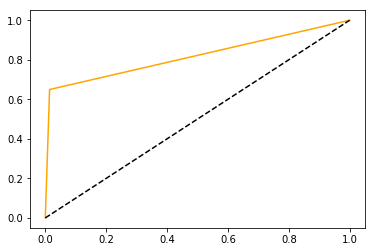

In [157]:
#plot of AUC for Model 1
fpr, tpr, threshold = roc_curve(y_test,  y_predict)
auc = roc_auc_score(y_test, y_predict)

plt.plot(fpr, tpr, color='orange', label='ROC')  
plt.plot([0, 1], [0, 1], 'k--')

In [158]:
# Model 2 using logisticRegression with unscaled features as inputs 
model2 = LogisticRegression()

X2_train, X2_test, y2_train, y2_test = train_test_split(bankLoan_ftr, bankLoan_Target, test_size=0.3, random_state = 42)

model2.fit(X2_train, y2_train)

y2_predict = model2.predict(X2_test)

print('confusion_matrix:')
print(confusion_matrix(y2_test, y2_predict))
print('classification_report:')
print(classification_report(y2_test, y2_predict))
print('roc_auc_score:', roc_auc_score(y2_test, y2_predict))

confusion_matrix:
[[1327   16]
 [  60   97]]
classification_report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.86      0.62      0.72       157

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.91      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500

roc_auc_score: 0.8029603843472405


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [159]:
# Model 3 using LogisticRegression with optimised parameters. 
Lreg = LogisticRegression(penalty='l1', class_weight='balanced')

Xl_train, Xl_test, yl_train, yl_test = train_test_split(bankLoan_ftr, bankLoan_Target, test_size=0.3, random_state = 42)

Lreg.fit(Xl_train, yl_train)

yl_predict = Lreg.predict(Xl_test)

print('confusion_matrix:')
print(confusion_matrix(yl_test, yl_predict))
print('classification_report:')
print(classification_report(yl_test, yl_predict))
print('roc_auc_score:', roc_auc_score(yl_test, yl_predict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion_matrix:
[[1190  153]
 [  14  143]]
classification_report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93      1343
           1       0.48      0.91      0.63       157

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.74      0.90      0.78      1500
weighted avg       0.94      0.89      0.90      1500

roc_auc_score: 0.8984519874223978


**Observations:**

After applying logistic regression, several parameters were tested to in order to optimize my models. The third model (Model 3) - Lreg, has an **AUC score** of **90%** compared to **82% of model 1** and **80%** of **model 2**. The clients who do not want personal loan (Class 0) performed worse in the second model than the 1st model. However, class balancing improved the overal capacity of the model to predict Class 1 with a recall value of **91%** compared to the first model with a recall of **66%** and second with a recall of **62**. Although there is an improvement in recall, the precision of the model has dropped significantly and this will affect the reliability of the model. **Model 1** thus is the preferred model of the logistic regression models

In [160]:
# Model 4 using Gausian Naive Bayes model

Xg_train, Xg_test, yg_train, yg_test = train_test_split(bankLoan_ftrz, bankLoan_Target, test_size=0.3, random_state = 42)

GBN = GaussianNB()
model3 = GBN.fit(Xg_train, yg_train)
y_pred = model3.predict(Xg_test)

print('confusion matrix:')
print(confusion_matrix(yg_test, y_pred))
print('classification_report:')
print(classification_report(yg_test, y_pred))
print('accuracy_score')
print(accuracy_score(yg_test, y_pred))
print('roc_auc_score')
print(roc_auc_score(yg_test, y_pred))

confusion matrix:
[[1243  100]
 [  63   94]]
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.48      0.60      0.54       157

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500

accuracy_score
0.8913333333333333
roc_auc_score
0.7621329754186604


**Observation**

The Gaussian regression model has an AUC of 76%. This largely trails all the AUC from the LogisticRegression Models. It also has a higher misclassification of the two classes. This makes it quite unreliable compared to the LogisticRegression models.

In [164]:
# Model 5 - using KNN

Xk_train, Xk_test, yk_train, yk_test = train_test_split(bankLoan_ftrz, bankLoan_Target, test_size=0.3, random_state = 42)

KNN1 = KNeighborsClassifier()

KNN = KNeighborsClassifier(n_neighbors=4, weights = 'distance')

modelK = KNN.fit(Xk_train, yk_train)

y_predK = KNN.predict(Xk_test)

print('confusion matrix:')
print(confusion_matrix(yk_test, y_predK))
print('classification_report:')
print(classification_report(yk_test, y_predK))
print('accuracy_score', accuracy_score(yk_test, y_predK))
print('roc_auc_score', roc_auc_score(yk_test, y_predK))

confusion matrix:
[[1338    5]
 [  42  115]]
classification_report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.96      0.73      0.83       157

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.96      0.86      0.91      1500
weighted avg       0.97      0.97      0.97      1500

accuracy_score 0.9686666666666667
roc_auc_score 0.8643805341212516


In [114]:
from sklearn.model_selection import GridSearchCV

def modelopt(X, y, model, param_grid, cv):
    Model_opt = GridSearchCV(model, param_grid, cv=cv)
    Model_opt.fit(X, y)
    print(Model_opt.best_params_)
    print(Model_opt.best_score_)


param_grid = {'n_neighbors':(np.arange(1, 10)), 'weights':('distance', 'uniform')}

modelopt(bankLoan_ftrz, bankLoan_Target, KNN1, param_grid, 10)



{'n_neighbors': 4, 'weights': 'distance'}
0.9638


**Observation**
Model 5 is a KNN model and the results are quite similar to that of Model 1. Howel, Model 5 surpases model 1 in terms of the accuracy while maintaining about similar recall values. Based on the first 5 models. **Model 5 is the preferred model**.

In [124]:
from sklearn import svm

model_svc = svm.SVC(class_weight='balanced')

param_grid = {'kernel':('poly', 'rbf', 'linear'), 'degree':(1,2), 'C':np.arange(0.001, 1, 10)}

modelopt(bankLoan_ftrz, bankLoan_Target, model_svc, param_grid, 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

{'C': 0.001, 'degree': 2, 'kernel': 'poly'}
0.9098


In [49]:
# Model 6 using SVM

from sklearn import svm

clf = svm.SVC(kernel='poly', degree=2)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(bankLoan_ftr, bankLoan_Target, test_size=0.3, random_state = 2)

clf.fit(Xb_train, yb_train)

yb_pred = clf.predict(Xb_test)

print('confusion_matrix')
print(confusion_matrix(yb_test, yb_pred))
print('classification_report')
print(classification_report(yb_test, yb_pred))
print('roc_auc_score', roc_auc_score(yb_test, yb_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


confusion_matrix
[[1341   21]
 [  34  104]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1362
           1       0.83      0.75      0.79       138

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.90      0.87      0.89      1500
weighted avg       0.96      0.96      0.96      1500

roc_auc_score 0.869102343101577


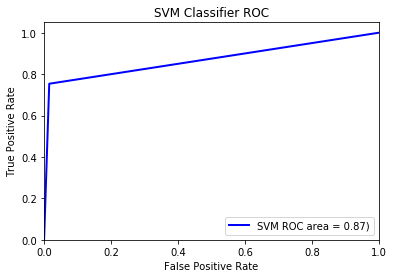

In [101]:
fpr, tpr, thresholds = roc_curve(yb_test,  yb_pred)
auc = roc_auc_score(yb_test, yb_pred)


plt.figure() 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.plot(0, 1, 0, 1, color='navy', linestyle='--') 
plt.xlim(0.0, 1.0) 
plt.ylim(0.0, 1.05) 
plt.title('SVM Classifier ROC') 
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' %auc)
plt.legend(loc="lower right")
plt.show()

#plt.plot(fpr, tpr,  color='orange', label='ROC' %auc)
##plt.plot([0, 1], [0, 1], 'k--')
#print(auc) #show all roc plot in one place

In [52]:
#Cross validation of SVM model using stratifiedKFold

from sklearn.model_selection import KFold, cross_validate, cross_val_score, StratifiedKFold

def cross_val(model, X, y, K):
    #define k-fold iterator
    cx_val = StratifiedKFold(K, shuffle=False, random_state=5)
    
    #get scores for each k-fold validator
    
    scores = cross_val_score(model,X, y, cv = cx_val)
    print(scores)
    
cross_val(clf, bankLoan_ftr, bankLoan_Target, K=5)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.959 0.973 0.968 0.975 0.972]


In [169]:
#Model 7 - using SVM with different parameters

from sklearn import svm

clf1 = svm.SVC(C=0.01, kernel='linear', gamma=1)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(bankLoan_ftrz, bankLoan_Target, test_size=0.3, random_state = 4)

clf1.fit(Xs_train, ys_train)

ys_pred = clf1.predict(Xs_test)

print('confusion_matrix:')
print(confusion_matrix(ys_test, ys_pred))
print('classification_report:')
print(classification_report(ys_test, ys_pred))
print('roc_auc_score', roc_auc_score(ys_test, ys_pred))

confusion_matrix:
[[1349    3]
 [  82   66]]
classification_report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1352
           1       0.96      0.45      0.61       148

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.95      0.72      0.79      1500
weighted avg       0.94      0.94      0.93      1500

roc_auc_score 0.7218635055173517


In [172]:
#Model 8 using optimised parameters, kernel poly of degree 2
from sklearn import svm

clf3 = svm.SVC(kernel='poly', degree=2, class_weight='balanced')
X3_train, X3_test, y3_train, y3_test = train_test_split(bankLoan_ftr, bankLoan_Target, test_size=0.3, random_state = 42)

clf3.fit(X3_train, y3_train)

y3_pred = clf3.predict(X3_test)

print('confusion_matrix:')
print(confusion_matrix(y3_test, y3_pred))
print('classification_report:')
print(classification_report(y3_test, y3_pred))
print('roc_auc_score', roc_auc_score(y3_test, y3_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


confusion_matrix:
[[1247   96]
 [  11  146]]
classification_report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1343
           1       0.60      0.93      0.73       157

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.80      0.93      0.85      1500
weighted avg       0.95      0.93      0.94      1500

roc_auc_score 0.9292272742363091


In [39]:
cross_val(clf3, bankLoan_ftr, bankLoan_Target, K=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.931 0.935 0.924 0.933 0.932]


**Observations**

1. Having tried several models (8) with different parameters, we can evaluate the performance based on recall and precision metrics. 

2. The first obvious outcome is that the models performed better for the class of clients that would not collect personal loan (Class 0) as compared to the class that collected (class 1). This is expected because of the sample sizes in the two classes.

3. In order to deal with this, I applied a class weight balancing to reduce the sampling bias in the model.

4. Of the first 5 models, KNN performed best with AUC of 82%, precison of 95%  and recall of 65%. The recall value of the class 1 makes this model not too good for production.

5. The SVM model (clf3) performed best in classifying the customers. I achieved a recall of 99% in the class that would not collect personal loan and a recall of 85% in the class that will collect personal loan. Showing that the error in predicting the true classes compared is about 15% in class 1 and 1% in class 0. 

6. Overall,the optimized SVM **Model 8 is the best performing model** for predicting both classes with a precision of 98% and 92%, recall of 99% and 85% for class 0 and class 1 respectively. And an **AUC of 92%**.

7. In order to test the performance of the best performing model on data not used for training, I used a KFold model to conduct cross validation of my model. The Stratified KFold classification using a K of 5 obtained 
